In [1]:
import ssl
print(ssl.OPENSSL_VERSION)

OpenSSL 1.1.1s  1 Nov 2022


In [37]:
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [38]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
#matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt


from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist.matching import matching, matching_dataset
from stardist.models import Config2D, StarDist2D, StarDistData2D

In [39]:
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [40]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

img = sorted(glob('input_image_small_part.tif'))
img= list(map(imread,img))


In [41]:
#Random color map labels
np.random.seed(42)
lbl_cmap = random_label_cmap()

Text(0.5, 1.0, 'prediction + input overlay')

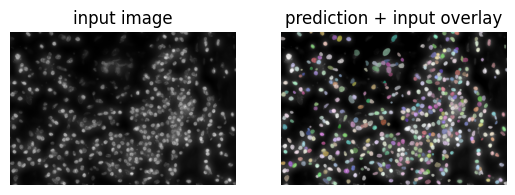

In [42]:

labels, _ = model.predict_instances(normalize(img[0])) #or for loop if many images

plt.subplot(1,2,1)
plt.imshow(img[0], cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img[0]))
plt.axis("off")
plt.title("prediction + input overlay")

In [14]:
print(labels.shape)
print(len(img)) #img: list 
#print(img[0])

(528, 777)
1
[[ 134  132  131 ...  150  151  143]
 [ 138  139  133 ...  148  144  138]
 [ 143  143  136 ...  141  138  133]
 ...
 [ 219  227  236 ... 1401 1319 1244]
 [ 215  225  242 ... 1392 1332 1268]
 [ 215  228  248 ... 1209 1203 1133]]


Running pre-trained model of stardist with our image and its mask 

In [65]:
img = sorted(glob('input_image_small_part.tif'))
img_lab= sorted(glob('input_image_small_part_ground_truth.tif'))
print(type(img))
print(type(labels))


<class 'list'>
<class 'numpy.ndarray'>


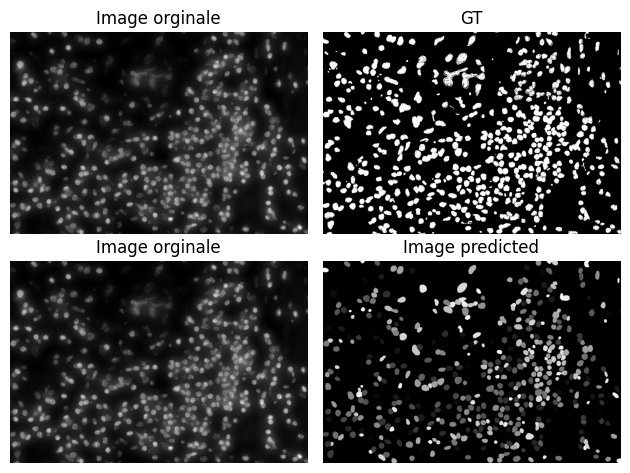

In [54]:


import matplotlib.pyplot as plt
from PIL import Image

# Charger les images TIFF
image1 = Image.open('input_image_small_part.tif')
image2 = Image.open('input_image_small_part_ground_truth.tif')

# Convertir les images en niveaux de gris si nécessaire
#if image1.mode != 'L':
 #   image1 = image1.convert('L')

if image2.mode != 'L':
    image2 = image2.convert('L')

# Créer une figure avec deux sous-plots
fig, axes = plt.subplots(2, 2)

# Afficher la première image dans le premier sous-plot
axes[0,0].imshow(image1, cmap='gray')
axes[0,0].set_title('Image orginale')
axes[0,0].axis('off')

# Afficher la deuxième image dans le deuxième sous-plot
axes[0,1].imshow(image2, cmap='gray')
axes[0,1].set_title('GT')
axes[0,1].axis('off')

axes[1,0].imshow(image1, cmap='gray')
axes[1,0].set_title('Image orginale')
axes[1,0].axis('off')

#axes[1,1].imshow(render_label(labels, img=img[0]), cmap='gray')
axes[1,1].imshow(labels, cmap='gray')
axes[1,1].set_title('Image predicted')
axes[1,1].axis('off')

# On ajuste la mise en page et on affiche la figure
plt.tight_layout()
plt.show()

In [75]:
import numpy as np
from sklearn.metrics import f1_score

def compute_f1_score(y_true, y_pred):
    if y_true.ndim == 1 and y_pred.ndim == 1:
        # Binary classification
        return f1_score(y_true, y_pred)
    else:
        # Multilabel-indicator or multiclass-multioutput
        if y_true.shape[1] == 1 or y_pred.shape[1] == 1:
            # Multilabel-indicator
            y_true = y_true.ravel()
            y_pred = y_pred.ravel()
        else:
            # Multiclass-multioutput
            y_true = np.argmax(y_true, axis=1)
            y_pred = np.argmax(y_pred, axis=1)
        
        return f1_score(y_true, y_pred, average='macro')

# for our example

image2_cv = np.array(image2)
f1 = compute_f1_score(image2_cv, labels)
print("F1 value between the GT and the pre-trained model of Stardist", f1)

F1 value between the GT and the pre-trained model of Stardist 0.008039060869249548
